In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [51]:
!pwd

/content


In [52]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/supply_train.csv")

In [53]:
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


# **Data Preprocessing**

**Checking for missing values**

In [54]:
#size of data
df.shape

(16620, 25)

In [55]:
#removing unnecessary columns
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('Ware_house_ID',axis=1)
df=df.drop('WH_Manager_ID',axis=1)
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [56]:
#checking for null values
df.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

Three columns contain null value:
workers_num : no. of workers in the warehouse(integer)
wh_est_year : warehouse establishment year, dtype: integer.
approved_wh_govt_certificate : Type of approval warehouse having been
issued by government, dtype: Object.


In [57]:
#filling null values:
#null values in the workers_num column is filled with the mean value
mean_workers_num=int(df['workers_num'].mean())
df['workers_num']=df['workers_num'].fillna(mean_workers_num)
df['workers_num'].isnull().sum()

0

In [58]:
#null values in the wh_est_year column is filled with the median value
median_wh_est_year=df['wh_est_year'].median()
median_wh_est_year
df['wh_est_year']=df['wh_est_year'].fillna(median_wh_est_year)
df['wh_est_year'].isnull().sum()

0

In [59]:
#null values in the approved_wh_govt_certificate column is filled with the mode
mode_approved_wh_govt_certificate=df['approved_wh_govt_certificate'].mode()
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(mode_approved_wh_govt_certificate[0])
df['approved_wh_govt_certificate'].isnull().sum()

0

In [60]:
#checking for null values after filling the null values
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

**Checking for duplicate values**

In [61]:
#checking for duplicate values
df.duplicated().sum()

0

**Checking for inconsistencies in categrical data**

In [62]:
cols=['Location_type','WH_capacity_size','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate']
for col in cols:
  values=df[col].value_counts()
  print(f'{col}:\n{values}')


Location_type:
Rural    15272
Urban     1348
Name: Location_type, dtype: int64
WH_capacity_size:
Large    6743
Mid      6691
Small    3186
Name: WH_capacity_size, dtype: int64
WH_regional_zone:
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: WH_regional_zone, dtype: int64
wh_owner_type:
Company Owned    8975
Rented           7645
Name: wh_owner_type, dtype: int64
approved_wh_govt_certificate:
C     4237
B+    3260
B     3220
A     3132
A+    2771
Name: approved_wh_govt_certificate, dtype: int64


There are no inconsistencies in categorical data

# Exploratory Data Analysis

**Analysis of Categorical data**

In [63]:
cat_columns=df.select_dtypes(include=object)
cat_columns.describe()

,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
count,16620,16620,16620,16620,16620,16620
unique,2,3,4,6,2,5
top,Rural,Large,North,Zone 6,Company Owned,C
freq,15272,6743,6800,5568,8975,4237


<ipython-input-64-6aebf6c1179a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column,palette='rocket')
<ipython-input-64-6aebf6c1179a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column,palette='rocket')
<ipython-input-64-6aebf6c1179a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column,palette='rocket')
<ipython-input-64-6aebf6c1179a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

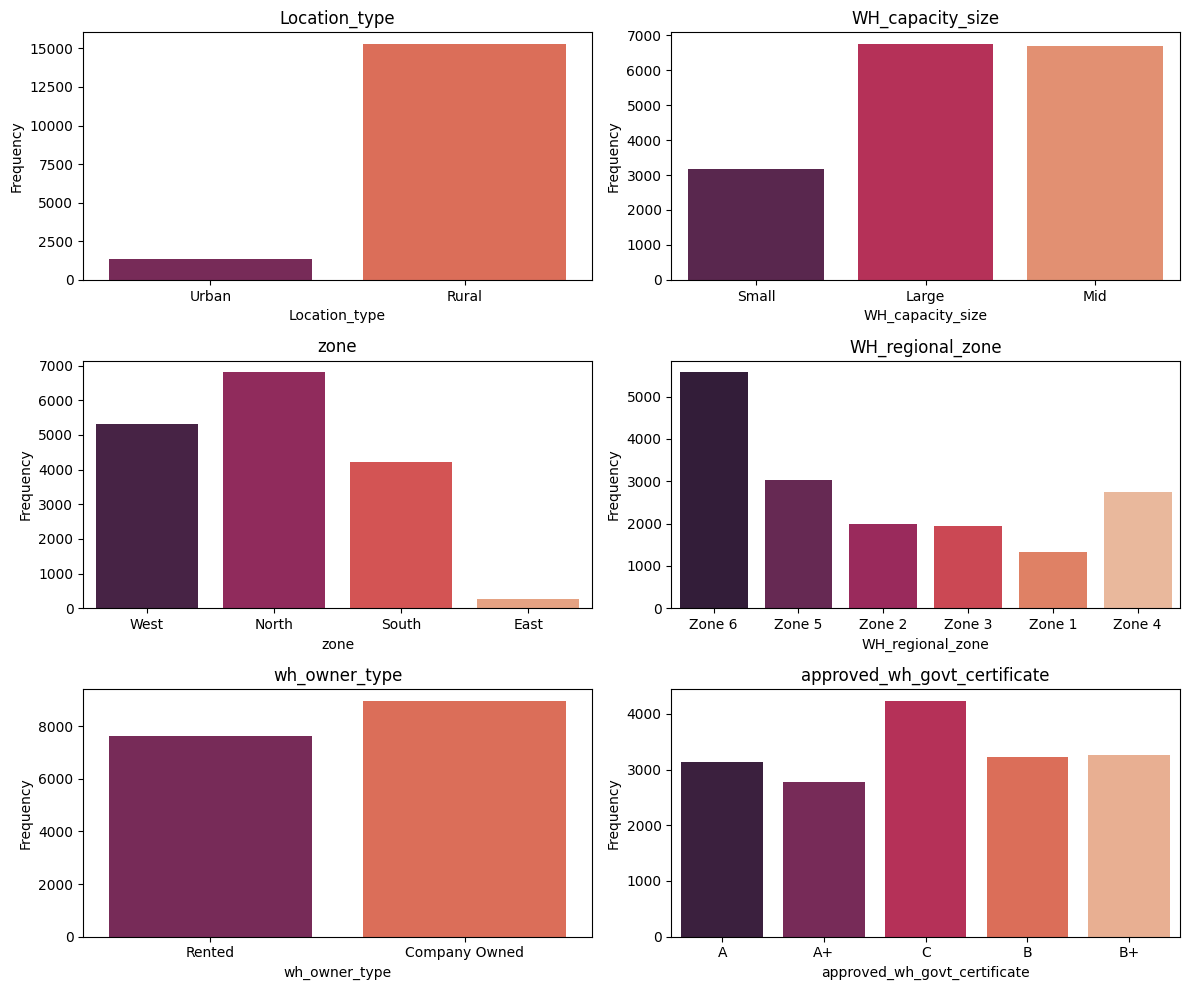

In [64]:
plt.figure(figsize=(12, 10))

for column in cat_columns.columns:
    plt.subplot(3, 2, cat_columns.columns.get_loc(column) + 1)
    sns.countplot(data=df, x=column,palette='rocket')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


**Interpretations :**



*   Majority of the warehouses are located in rural areas.
*   The number of warehouses with 'large' and 'medium' capacities are almost same and less number of warehouses with 'small' capacity.
*   North zone has the maximum nuber of warehouses,followed by West and South zones and East zone has the least.
*.  Zone 6 has the maximum number of warehouses.
*.  Majority of warehouses are company owned.
*.  Most of the warehouses have been issued 'C' category certificate by the Government


**Distribution of target variable 'product_wg_ton' across the categorical features**

<ipython-input-66-03fe04fc47b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=column, y='product_wg_ton',palette='pastel')
<ipython-input-66-03fe04fc47b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=column, y='product_wg_ton',palette='pastel')
<ipython-input-66-03fe04fc47b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=column, y='product_wg_ton',palette='pastel')
<ipython-input-66-03fe04fc47b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

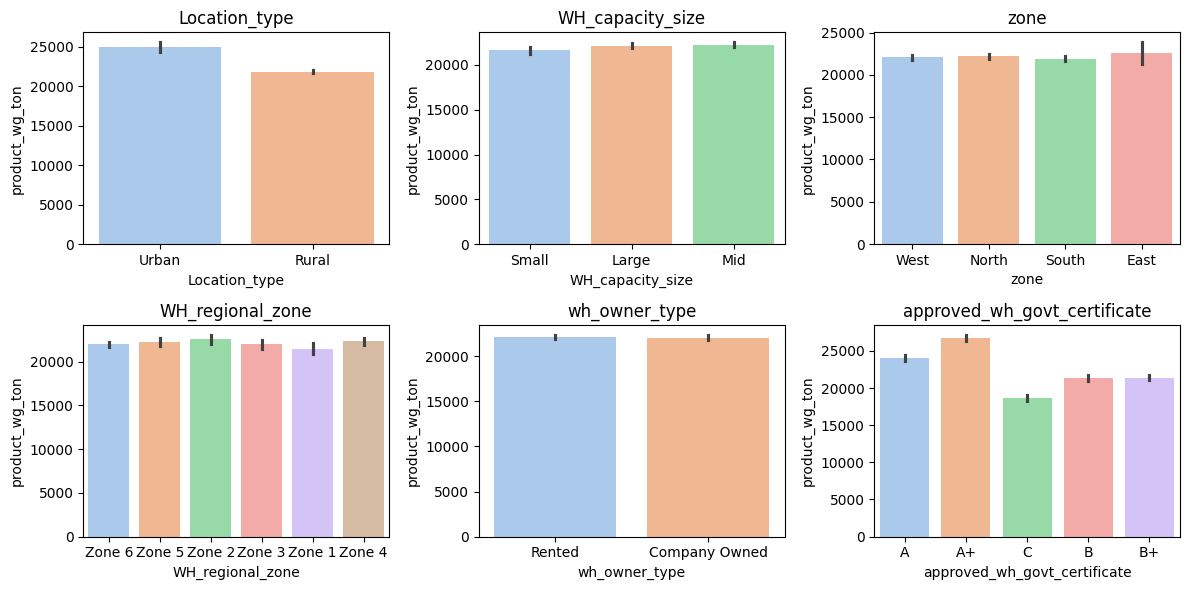

In [66]:
plt.figure(figsize=(12, 6))
num_columns = len(cat_columns)

# grid of subplots for categorical columns
for id, column in enumerate(cat_columns, start=1):
    plt.subplot(2, 3, id)
    sns.barplot(data=df, x=column, y='product_wg_ton',palette='pastel')
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

**Interpretations:**


*   Urban areas have large product weight.
*.  Shipment sizes does not show much variation based on Warehouse capacity.
*.  Product weights are slightly higher for "East" zone when compared to all the other zones.
*.  Shipment sizes are not influenced by warehouse owner type (wh_owner_type)
*.  A+ followed by A certified warehouses can handle large product weight.




**Analysis of numerical data**

In [15]:
numer_columns = df.select_dtypes(include=['number'])
numer_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,16620.0,4.126655,2.606241,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,16620.0,0.780927,1.206351,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,16620.0,3.103129,1.147711,0.0,2.0,3.0,4.0,12.0
retail_shop_num,16620.0,4983.904994,1051.032239,1821.0,4309.0,4856.0,5500.0,11008.0
distributor_num,16620.0,42.473706,16.090000,15.0,29.0,42.0,56.0,70.0
flood_impacted,16620.0,0.096871,0.295791,0.0,0.0,0.0,0.0,1.0
flood_proof,16620.0,0.056017,0.229961,0.0,0.0,0.0,0.0,1.0
electric_supply,16620.0,0.655716,0.475149,0.0,0.0,1.0,1.0,1.0
dist_from_hub,16620.0,163.521901,62.701193,55.0,109.0,164.0,218.0,271.0
workers_num,16620.0,28.874910,7.685148,10.0,24.0,28.0,33.0,98.0


**Interpretations:**



*   Transport issues (transport_issue_l1y) reported for warehouses for the last one year is very low. Less than 75% of data shows only a maximum of 1 issue reported.
*   There are 2 to 12 competitors (Competitor_in_mkt), with an average of 3 competitors in every regional zone.
*.  On an average there are 42 distributors (distributor_num) associated with each warehouse.
*.  An average of 28 workers (workers_num) are employed in each warehouse and the maximum upto 98.
*.  The average number of storage issues (storage_issue_reported_l3m) reported is 17 in the last 3 months and a maximum of 39 issues have been reported in case of some warehouses.
*.  Government checks have been conducted on an average of 18 times in last 3 months. Maximum number of checks conducted is 32.



**Analysis:**

For the enhancement of Supply chain, the FMCG company has to focus on the following areas:


1.   Demand across zones
2.   Supply chain efficiency
3.   Competitors in the market
4.   Operational risks

Each of these are analysed in the following session

1. Demand distibution across zones

<ipython-input-65-60044c63b864>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('zone').sum().reset_index()


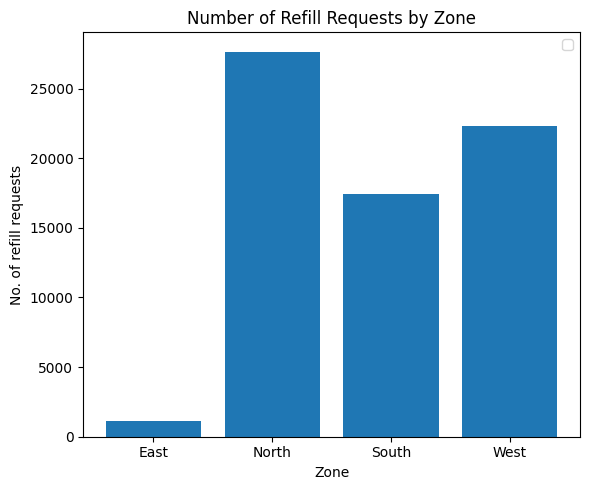

In [65]:
# Group the data by zone
#calculate the sum of 'num_refill_req_l3m' and 'retail_shop_num' for each zone

grouped_data = df.groupby('zone').sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(6,5))
plt.bar(grouped_data['zone'], grouped_data['num_refill_req_l3m'])
plt.xlabel('Zone')
plt.ylabel('No. of refill requests')
plt.title('Number of Refill Requests by Zone')
plt.legend()
plt.tight_layout()
plt.show()

North zone has made the maximum number opf refill requests whereas east has the minimum.

2. Supply chain efficiency

Supply is affectd by the storage, transport and warehouse breakdown

In [66]:
# Group data by zone
#calculate the count of storage issues and transport issues in each zone

zone_issues = df.groupby('zone')[['storage_issue_reported_l3m', 'transport_issue_l1y','wh_breakdown_l3m']].sum().reset_index()
zone_issues

,zone,storage_issue_reported_l3m,transport_issue_l1y,wh_breakdown_l3m
0,East,4886,211,967
1,North,116895,5395,23594
2,South,71683,3292,14648
3,West,91190,4081,18813


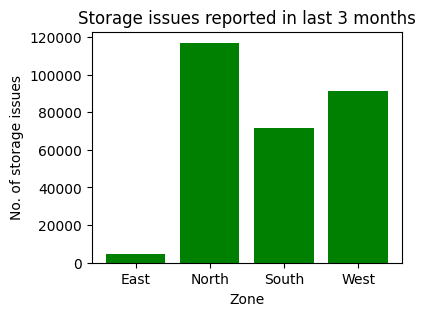

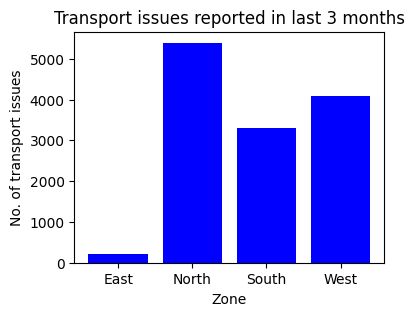

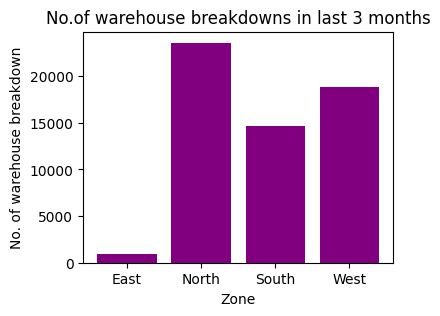

In [67]:
#create a function to generate bar charts
def bar_chart(x,y,ylabel,title,color):
  plt.figure(figsize=(4,3))
  plt.bar(x, y, color=color)
  plt.xlabel('Zone')
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

bar_chart(zone_issues['zone'],zone_issues['storage_issue_reported_l3m'],'No. of storage issues','Storage issues reported in last 3 months','green')
bar_chart(zone_issues['zone'],zone_issues['transport_issue_l1y'],'No. of transport issues','Transport issues reported in last 3 months','blue')
bar_chart(zone_issues['zone'],zone_issues['wh_breakdown_l3m'],'No. of warehouse breakdown','No.of warehouse breakdowns in last 3 months','purple')


Compared to all other zones,North zone reported a higher number of storage issues, transport issues, and warehouse breakdowns. The East zone has a relatively smaller number of issues. The number of storage and warehouse issues across zones are higher in the last 3 months. In comparison, the number of transport issues reported is lower.

Text(0.5, 1.0, 'Location Type Distribution')

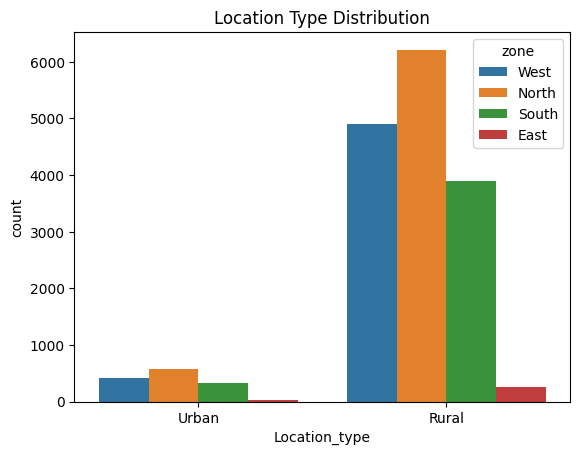

In [ ]:
#Location_Type Distribution
sns.countplot(data=df,x='Location_type',hue='zone')
plt.title('Location Type Distribution')



The number of warehouses in Urban zones is very less which may affect the efficency of the company.
Also, it is seen that the number of warehouses is very minimal in the east zone in both Urban and Rural areas.

In [ ]:
#Zonal Distribution of warehouses

#calculate distribution percentage zone wise
total_weight=df['product_wg_ton'].sum()
df['percentage']=(df['product_wg_ton']/total_weight)*100

In [ ]:
weight_by_zone=df.groupby('zone')['percentage'].sum()
weight_by_zone

zone
East      1.701141
North    41.079075
South    25.199206
West     32.020577
Name: percentage, dtype: float64

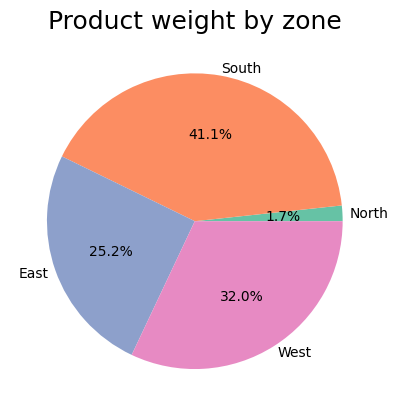

In [ ]:
labels=['North','South','East','West']
color_palette=sns.color_palette('Set2')
plt.pie(weight_by_zone,labels=labels,colors=color_palette,autopct='%1.1f%%',labeldistance=1.05)
plt.title('Product weight by zone',fontsize=18)
plt.show()

Large proportion of the product,41.1% is shipped to North, whereas only,1.7% is shipped to the East zone which may be a zone to improve the market.

We need to find the storage capacity in each zone.

In [19]:
x=df['WH_capacity_size'].value_counts()
x

Large    6743
Mid      6691
Small    3186
Name: WH_capacity_size, dtype: int64

In [20]:
zone_capacity=df.groupby('zone')['WH_capacity_size'].count()
zone_capacity

zone
East      277
North    6800
South    4223
West     5320
Name: WH_capacity_size, dtype: int64

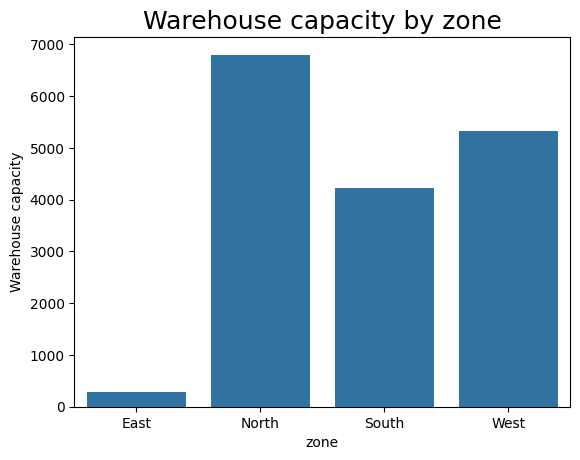

In [ ]:
sns.barplot(zone_capacity)
plt.xlabel('zone')
plt.ylabel('Warehouse capacity')
plt.title('Warehouse capacity by zone',fontsize=18)
plt.show()

Warehouse capacity is maximum in the North and minimum in the east zone

Analyse the product weight by storage issues in the last three months

Text(0.5, 1.0, 'Product weight by storage issues in the last three months')

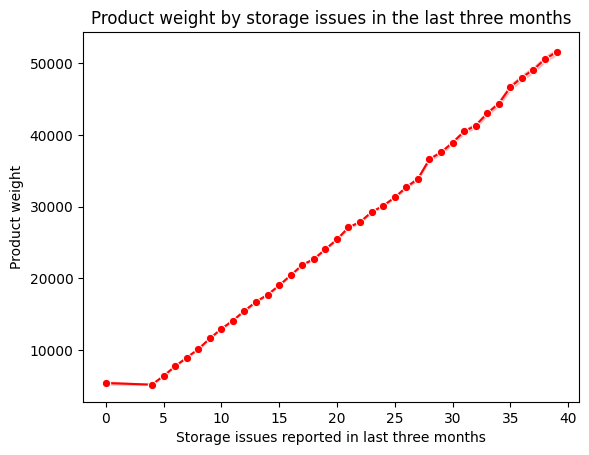

In [16]:
sns.lineplot(data=df,x='storage_issue_reported_l3m',y='product_wg_ton',color='red',marker='o')
plt.xlabel('Storage issues reported in last three months')
plt.ylabel('Product weight')
plt.title('Product weight by storage issues in the last three months')

The more the product weight, the more the storage issues received

3. Competitors in the market

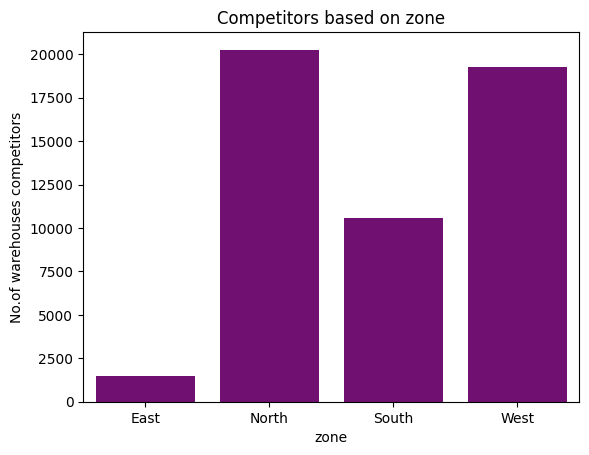

In [17]:
#Group data by zone
#count the number of competitors in each zone
competitors=df.groupby('zone')['Competitor_in_mkt'].sum()

sns.barplot(competitors,color='purple')
plt.title('Competitors based on zone')
plt.xlabel('zone')
plt.ylabel('No.of warehouses competitors')
plt.show()

Majority of the competitors are concentrated in the North followed by West zone.

3. Operational Risks

Operational risks associated with the warehouses include flood impacted (flood_impacted),electricity supply (electric_supply) and Government checks(govt_check_l3m).


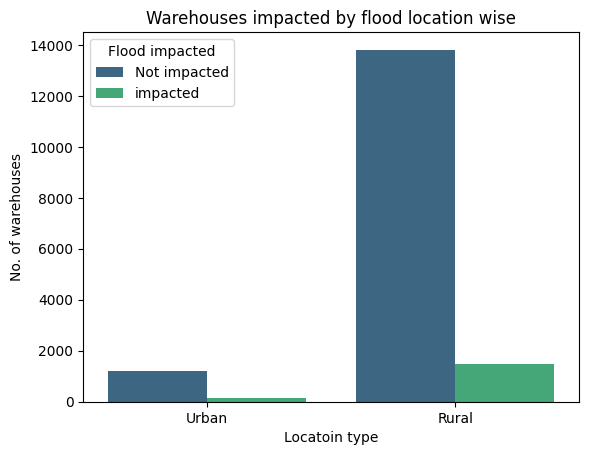

In [83]:
sns.countplot(data=df,x='Location_type',hue='flood_impacted',palette='viridis')
plt.title('Warehouses impacted by flood location wise')
plt.xlabel('Locatoin type')
plt.ylabel('No. of warehouses')
plt.legend(title='Flood impacted',labels=['Not impacted','impacted'])
plt.show()

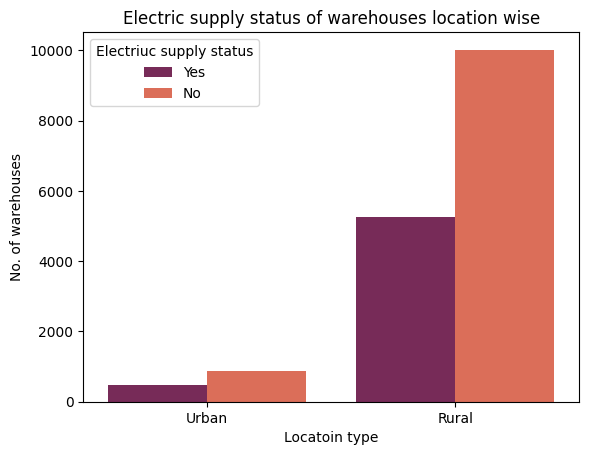

In [82]:
sns.countplot(data=df,x='Location_type',hue='electric_supply',palette='rocket')
plt.title('Electric supply status of warehouses location wise')
plt.xlabel('Locatoin type')
plt.ylabel('No. of warehouses')
plt.legend(title='Electriuc supply status',labels=['Yes','No'])
plt.show()

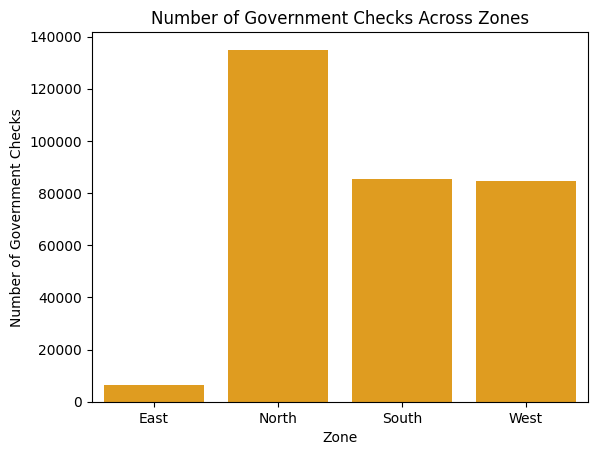

In [84]:
zone_gov_check=df.groupby('zone')['govt_check_l3m'].sum()

sns.barplot(zone_gov_check,color='orange')
plt.xlabel('Zone')
plt.ylabel('Number of Government Checks')
plt.title('Number of Government Checks Across Zones')

plt.show()

Interpretations:



*   Flood resilience and electric supply are to improved in the rural areas.
*   More Governemnt checks happened in the North zone




# **Correlation**

<ipython-input-18-5653a042162a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='YlGnBu',annot=True,linewidths=0.5,fmt=".2f")


<Axes: >

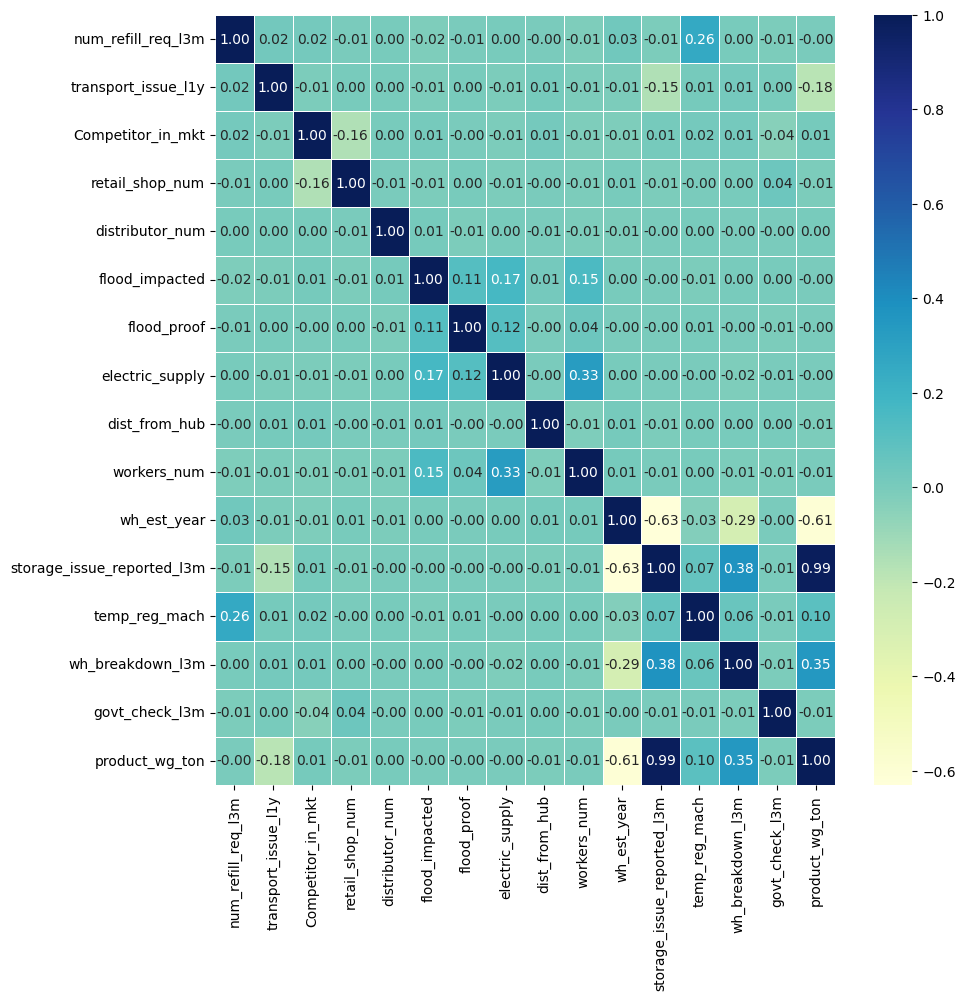

In [18]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(),cmap='YlGnBu',annot=True,linewidths=0.5,fmt=".2f")

From the correlation chart, we understand that Product Weight and Store issues reported are highly correlated.


*    A good positive correlation (0.99) is found between Product weight(product_wg_ton) and storage issues reported (storage_issue_reported_l3m).
*.   wh_est_year (Year at which warehouse was established) has a positive correlation of 0.63 with storage_issue_reported_l3m (storage issues reported) and 0.61 with product_wg_ton (weight of product in tons).

<ipython-input-67-18ed241c19d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('product_wg_ton',axis=1).corrwith(df.product_wg_ton).plot(kind='bar',grid=True,title="Correlation with target",figsize=(10,8))


<Axes: title={'center': 'Correlation with target'}>

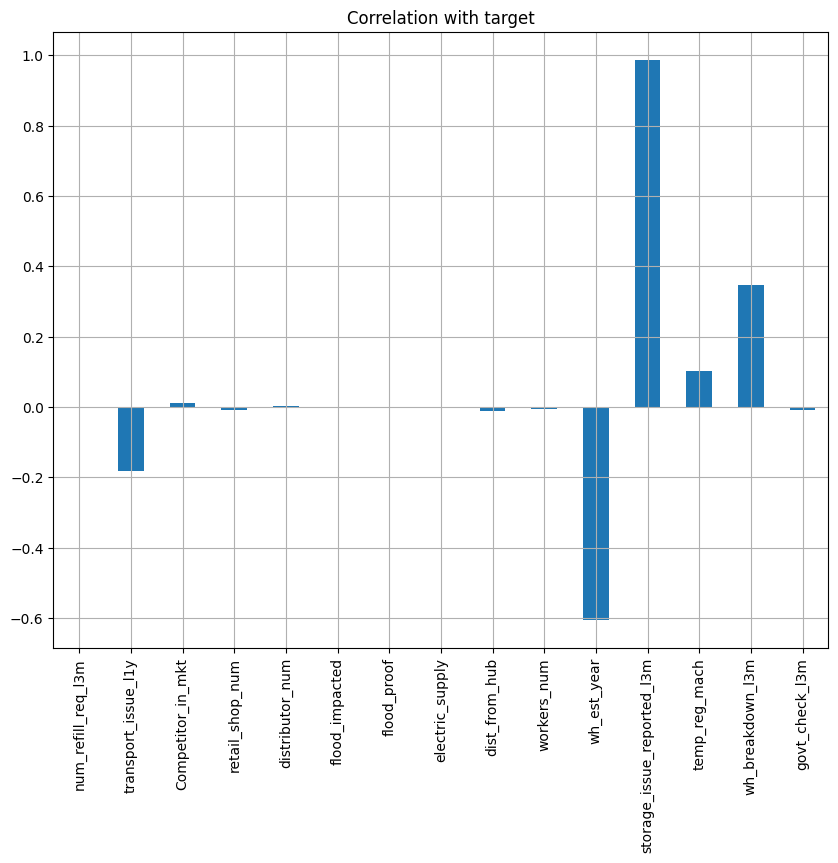

In [67]:
#correlation with target
df.drop('product_wg_ton',axis=1).corrwith(df.product_wg_ton).plot(kind='bar',grid=True,title="Correlation with target",figsize=(10,8))

storage_issue_reported_l3m , wh_breakdown_l3m and wh_est_year are most correlated with the target.storage_issue_reported_l3m and wh_breakdown_l3m are positively correlated and wh_est_year is negatively correlated.

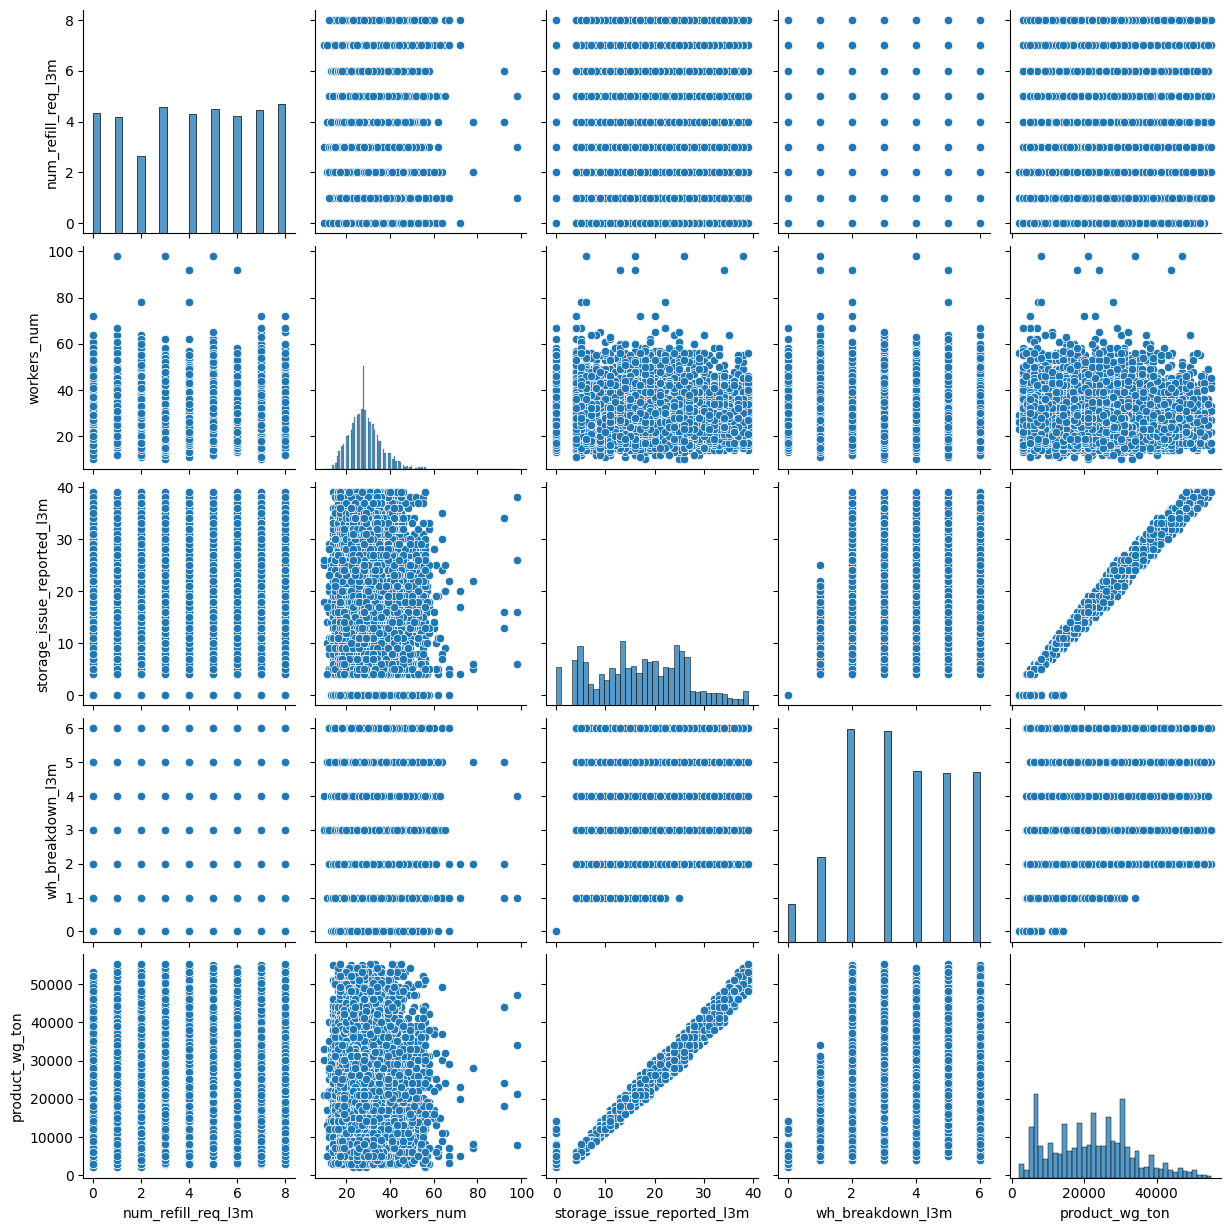

In [68]:
num_cols = ['num_refill_req_l3m', 'workers_num', 'storage_issue_reported_l3m', 'wh_breakdown_l3m','product_wg_ton']

# Create a DataFrame with only the selected columns
num_df = df[num_cols]

# Create the pairplot
sns.pairplot(num_df, diag_kind='hist')
plt.show()

## Label Encoding

In [69]:

le=LabelEncoder()
df['Location_type']=le.fit_transform(df['Location_type'])
df['WH_capacity_size']=le.fit_transform(df['WH_capacity_size'])
df['WH_regional_zone']=le.fit_transform(df['WH_regional_zone'])
df['approved_wh_govt_certificate']=le.fit_transform(df['approved_wh_govt_certificate'])
df['zone']=le.fit_transform(df['zone'])
df['wh_owner_type']=le.fit_transform(df['wh_owner_type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  int64  
 1   WH_capacity_size              16620 non-null  int64  
 2   zone                          16620 non-null  int64  
 3   WH_regional_zone              16620 non-null  int64  
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  int64  
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

In [70]:
df.shape

(16620, 22)

### Splitting Train data into predictor variables(X) and target variable (y)

In [71]:
X_train=df.drop(columns=['product_wg_ton'])
y_train=df['product_wg_ton']

In [72]:
X_train.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,...,1,1,91,29.0,2009.0,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,...,0,1,210,31.0,2009.0,4,0,0,3,17
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,161,37.0,2009.0,17,0,0,6,22
3,0,1,1,2,7,4,2,6000,1,50,...,0,0,103,21.0,2009.0,17,1,1,3,27
4,0,0,1,4,3,1,2,4740,0,42,...,0,1,112,25.0,2009.0,18,0,4,6,24


In [73]:
y_train.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

### Test Data

In [74]:
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/supply_test.csv")

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [76]:
#removing unnecessary columns
test.drop(columns=['Unnamed: 0','Ware_house_ID','WH_Manager_ID'],inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 5529 non-null   object 
 1   WH_capacity_size              5529 non-null   object 
 2   zone                          5529 non-null   object 
 3   WH_regional_zone              5529 non-null   object 
 4   num_refill_req_l3m            5529 non-null   int64  
 5   transport_issue_l1y           5529 non-null   int64  
 6   Competitor_in_mkt             5529 non-null   int64  
 7   retail_shop_num               5529 non-null   int64  
 8   wh_owner_type                 5529 non-null   object 
 9   distributor_num               5529 non-null   int64  
 10  flood_impacted                5529 non-null   int64  
 11  flood_proof                   5529 non-null   int64  
 12  electric_supply               5529 non-null   int64  
 13  dis

In [77]:
test.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Rural,Large,North,Zone 5,5,0,3,5590,Company Owned,15,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,Rural,Large,North,Zone 5,5,0,2,5856,Company Owned,40,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,Rural,Small,North,Zone 6,3,0,3,4803,Rented,40,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,Rural,Mid,West,Zone 4,5,2,2,4784,Rented,15,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,Urban,Mid,North,Zone 4,6,0,4,3699,Rented,24,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [78]:
#check for duplicates
test.duplicated().sum()

0

Handling missing values

In [79]:
test.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

Null values are found in 'workers_num' (number of workers), 'wh_est_year'(year the warehouse was established) and 'approved_wh_govt_certificate' columns. These are handled similar to the null valures handled in train data.

In [80]:
# Replacing missing values in 'workers_num' with median value
test['workers_num'].fillna(test['workers_num'].median(),inplace=True)

In [81]:
# Replacing missing values in 'wh_est_year' with mean
test['wh_est_year'].fillna(test['wh_est_year'].mean(),inplace=True)

In [82]:
# Replacing missing values in 'approved_wh_govt_certificate' with mode
test['approved_wh_govt_certificate'].fillna(test['approved_wh_govt_certificate'].mode()[0],inplace=True)

In [83]:
test.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

### Label Encoding

In [84]:
le=LabelEncoder()
test['Location_type']=le.fit_transform(test['Location_type'])
test['WH_capacity_size']=le.fit_transform(test['WH_capacity_size'])
test['WH_regional_zone']=le.fit_transform(test['WH_regional_zone'])
test['approved_wh_govt_certificate']=le.fit_transform(test['approved_wh_govt_certificate'])
test['zone']=le.fit_transform(test['zone'])
test['wh_owner_type']=le.fit_transform(test['wh_owner_type'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 5529 non-null   int64  
 1   WH_capacity_size              5529 non-null   int64  
 2   zone                          5529 non-null   int64  
 3   WH_regional_zone              5529 non-null   int64  
 4   num_refill_req_l3m            5529 non-null   int64  
 5   transport_issue_l1y           5529 non-null   int64  
 6   Competitor_in_mkt             5529 non-null   int64  
 7   retail_shop_num               5529 non-null   int64  
 8   wh_owner_type                 5529 non-null   int64  
 9   distributor_num               5529 non-null   int64  
 10  flood_impacted                5529 non-null   int64  
 11  flood_proof                   5529 non-null   int64  
 12  electric_supply               5529 non-null   int64  
 13  dis

### Splitting Test data into predictor variables(X) and target variable (y)

In [85]:
X_test=test.drop(columns=['product_wg_ton'])
y_test=test['product_wg_ton']

In [86]:
X_test

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,0,1,4,5,0,3,5590,0,15,...,0,0,156,30.0,2006.000000,24,0,0,2,5
1,0,0,1,4,5,0,2,5856,0,40,...,0,1,79,31.0,2019.000000,5,1,4,2,24
2,0,2,1,5,3,0,3,4803,1,40,...,0,1,70,41.0,2008.000000,19,1,1,5,9
3,0,1,3,3,5,2,2,4784,1,15,...,0,1,255,33.0,2017.000000,9,1,1,3,11
4,1,1,1,3,6,0,4,3699,1,24,...,0,0,205,20.0,1999.000000,25,0,2,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,1,5,8,1,3,5030,1,46,...,0,1,203,28.0,2007.000000,22,1,1,2,4
5525,0,2,2,5,3,1,3,4320,1,60,...,0,0,170,28.0,2009.572785,26,0,4,5,9
5526,0,0,1,5,7,2,2,5268,0,64,...,0,0,99,22.0,2009.572785,20,0,3,6,4
5527,0,0,1,5,6,2,4,4378,1,32,...,0,0,220,17.0,2009.572785,13,0,2,3,28


In [87]:
y_test

0       30132
1        6075
2       24076
3       13092
4       29071
        ...  
5524    29138
5525    33108
5526    24072
5527    15055
5528    14103
Name: product_wg_ton, Length: 5529, dtype: int64

## Modelling

### Regression models are used for the Warehouse Supply chain optimization

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

### Linear Regression

In [89]:
#scaling the numerical features
#Min-Max scaling is applied to specific columns of the training and test datasets to transform these columns to a
# common scale, where values are normalized between 0 and 1.
scaler=MinMaxScaler()

X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()

cols_to_scale= ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
                'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m']
X_train_scaled[cols_to_scale]=scaler.fit_transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])



In [90]:
#training the Linear Regtression model
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,y_train)

#make predictions
y_predict=lr_model.predict(X_test_scaled)

#calculate MSE,RMSE and R2 score
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 3075427.372478451
Root Mean Squared Error (RMSE): 1753.6896454271637
R-squared (R2) Score: 0.9773196389348151


In [91]:
#initialize and train models

models={
    'Random Forest Regressor' : RandomForestRegressor(),
    'Ada Boost Regressor' : AdaBoostRegressor(),
    'Bagging Regressor' : BaggingRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor()

}


#initialize lists to store evaluation metrics
model_names=[]
mse_scores=[]
rmse_scores=[]
r2_scores=[]

#fit each regression model and calaculate evaluation matrics
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  mse=mean_squared_error(y_test,y_pred)
  rmse=np.sqrt(mse)
  mse=format(mse,'.4f')
  rmse=format(rmse,'.4f')
  r2=r2_score(y_test,y_pred)

  model_names.append(name)
  mse_scores.append(mse)
  rmse_scores.append(rmse)
  r2_scores.append(r2)

#dataframe to store the evaluation matrics
eval_matrics=pd.DataFrame({
    'Regression Model':model_names,
    'Mean Squared Error (MSE)':mse_scores,
    'Root Mean Squared Error (RMSE)':rmse_scores,
    'R^2 scores':r2_scores
})

eval_matrics.sort_values(by='R^2 scores',ascending=False).reset_index(drop=True)


,Regression Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R^2 scores
0,Gradient Boosting Regressor,828181.7937,910.0449,0.993892
1,Random Forest Regressor,841190.3390,917.1643,0.993796
2,Bagging Regressor,905912.3625,951.7943,0.993319
3,Ada Boost Regressor,2968152.9820,1722.8328,0.978111


## Model Selection

From the above metrics, Gradient Boosting Regression model has the highest R^2 score and the least Mean Squared Error and Root Mean Squared Error.
Gradient Boosting Regression is chosen as the accurate model for the regression task.

## Randomized Cross Search Validation for Hyperparameter Tuning

Cross-validation is a technique for evaluating a machine learning model and testing its performance. CV is commonly used in applied ML tasks. It helps to compare and select an appropriate model for the specific predictive modeling problem.
Randomized Search Cross-Validation searches for the most effective hyperparameters for a Gradient Boosting Regressor model by conducting multiple iterations, trying out different combinations of hyperparameters to minimize mean squared error during cross-validation.

In [92]:
Grad_reg=GradientBoostingRegressor()

#parameters for Randomized Search
params={
    'n_estimators' : [50,100,150],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}


#randomized search cross-validation
random_search= RandomizedSearchCV(estimator=Grad_reg,param_distributions=params,
                                  scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=1,random_state=42)
random_search.fit(X_train,y_train)

#best model and best parameters
best_model=random_search.best_estimator_
best_params=random_search.best_params_

#evaluate the best model in the test data
y_pred=best_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

#Dataframe to view results
cv_results=pd.DataFrame(random_search.cv_results_)
print('Randomized Search Cross-Validation Results:')
cv_results


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized Search Cross-Validation Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.229871,0.264636,0.027794,0.003300,150,5,0.01,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-7.989772e+06,-8.098977e+06,-8.176604e+06,-8.247882e+06,-7.679806e+06,-8.038608e+06,198799.657572,9
1,3.260324,0.383222,0.012192,0.000217,100,4,0.1,"{'n_estimators': 100, 'max_depth': 4, 'learnin...",-7.595566e+05,-7.982803e+05,-7.209057e+05,-8.148769e+05,-7.373888e+05,-7.662017e+05,35565.086897,4
2,1.361991,0.195088,0.007732,0.000955,50,3,0.1,"{'n_estimators': 50, 'max_depth': 3, 'learning...",-9.627233e+05,-9.876990e+05,-9.374099e+05,-1.048982e+06,-9.632038e+05,-9.800035e+05,37979.626731,8
3,1.554239,0.010634,0.007636,0.000172,50,4,0.2,"{'n_estimators': 50, 'max_depth': 4, 'learning...",-7.497828e+05,-8.063500e+05,-7.203874e+05,-8.096128e+05,-7.466148e+05,-7.665496e+05,35349.628770,5
4,1.378925,0.194458,0.008052,0.001199,50,3,0.01,"{'n_estimators': 50, 'max_depth': 3, 'learning...",-5.161619e+07,-5.239056e+07,-5.324776e+07,-5.236196e+07,-5.056593e+07,-5.203648e+07,898630.124913,10
5,3.909343,0.453281,0.013724,0.001464,150,3,0.1,"{'n_estimators': 150, 'max_depth': 3, 'learnin...",-7.582413e+05,-7.908273e+05,-7.297676e+05,-8.247567e+05,-7.598682e+05,-7.726922e+05,32420.339950,6
6,4.216884,0.231944,0.016208,0.002314,100,5,0.1,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-7.276548e+05,-7.792703e+05,-7.088290e+05,-8.034046e+05,-7.287504e+05,-7.495818e+05,35647.835618,1
7,6.138230,0.516670,0.018401,0.000513,150,5,0.1,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-7.297684e+05,-7.867045e+05,-7.072249e+05,-8.045221e+05,-7.348238e+05,-7.526087e+05,36756.468540,2
8,1.763102,0.253209,0.009205,0.001172,50,4,0.1,"{'n_estimators': 50, 'max_depth': 4, 'learning...",-8.298632e+05,-8.552936e+05,-7.910363e+05,-9.087228e+05,-8.071448e+05,-8.384121e+05,41288.658210,7
9,2.035159,0.237501,0.008979,0.001113,50,5,0.2,"{'n_estimators': 50, 'max_depth': 5, 'learning...",-7.364384e+05,-7.862094e+05,-7.155966e+05,-8.023813e+05,-7.296514e+05,-7.540554e+05,33924.210995,3


In [44]:
#best model and its parameters
print("\nBest Model:")
print(best_model)
print("\nBest Parameters:")
print(best_params)

print("\nEvaluation Metrics for Best Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


Best Model:
GradientBoostingRegressor(max_depth=5)

Best Parameters:
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

Evaluation Metrics for Best Model:
Mean Squared Error (MSE): 801020.82
Root Mean Squared Error (RMSE): 895.00
R-squared (R^2): 0.99


### Prediction using the best model

In [45]:
y_pred=best_model.predict(X_test)

#DataFrame to store the predicted and actual values
final_df=pd.DataFrame({'Actual Values (y_test)': y_test, 'Predicted Values (y_pred)': y_pred})

print("\nActual vs. Predicted Values:")
final_df


Actual vs. Predicted Values:


,Actual Values (y_test),Predicted Values (y_pred)
0,30132,30871.470155
1,6075,6885.707423
2,24076,25357.568954
3,13092,12802.644024
4,29071,29730.794840
...,...,...
5524,29138,29367.149278
5525,33108,33840.326312
5526,24072,23407.043010
5527,15055,15373.879765


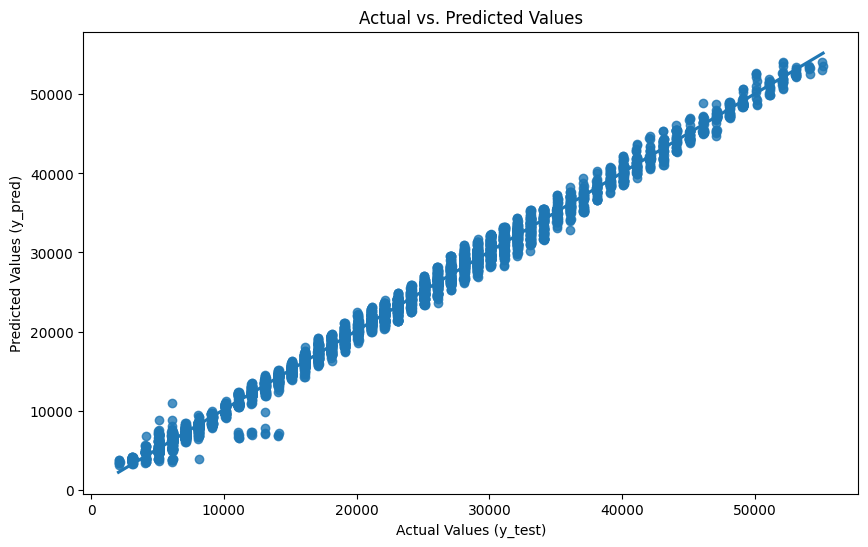

In [46]:
#regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Values (y_test)', y='Predicted Values (y_pred)', data=final_df)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()